In [1]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [11]:
from torchvision import transforms
#from dataloaders import custom_transforms as tr

class FactorySegmentation():
    NUM_CLASSES = 5
    
    def __init__(self, data_dir="/home/kataoka/dataset/factory_seg/",split='train'):
        self.label_path = glob(data_dir+"label_img/*")
        img_path = [p.split("/")[-1].split(".")[0] for p in self.label_path]
        self.img_path = [data_dir+"data_img/"+num+".png" for num in img_path]
        self.split = split
        
    def __getitem__(self, index):
        _img = np.array(Image.open(self.img_path[index]).convert('RGB'), dtype=np.float32)
        _target = np.array(Image.open(self.label_path[index]).convert('RGB'), dtype=np.float32)
        _target = self._gen_seg_mask(_target)
        sample = {'image': _img, 'label': _target}
        
        if self.split == "train":
            return self.transform_tr(sample)
        elif self.split == 'val':
            return self.transform_val(sample)
    
    def transform_tr(self, sample):
        composed_transforms = transforms.Compose([
#             tr.RandomGaussianBlur(),
#             tr.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#             tr.ToTensor()
        ])
        return composed_transforms(sample)
    
    def transform_val(self, sample):
        composed_transforms = transforms.Compose([
#             tr.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#             tr.ToTensor()
        ])
        return composed_transforms(sample)
    
    def _gen_seg_mask(self, target):
        target /= 255
        mask = target[:,:,0] + target[:,:,1]*2 + target[:,:,2]*3

        mask = np.where(mask==1, 1, mask)
        mask = np.where(mask==2, 2, mask)
        mask = np.where(mask==3, 3, mask)
        mask = np.where(mask==6, 4, mask)
        return mask
    
    def __len__(self):
        return len(self.img_path)

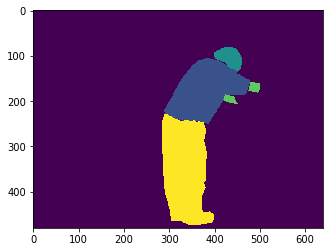

In [12]:
from torch.utils.data import DataLoader

factory_train = FactorySegmentation()
dataloader = DataLoader(factory_train, batch_size=4, shuffle=True, num_workers=0)

for ii, sample in enumerate(dataloader):
    for jj in range(sample["image"].size()[0]):
        img = sample['image'].numpy()
        gt = sample['label'].numpy()
        tmp = np.array(gt[jj]).astype(np.uint8)
        if jj==0 and ii==0:
            plt.imshow(tmp)

[[4. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [4. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]]


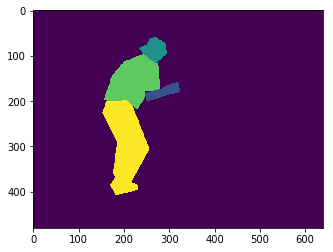

In [95]:
l = labels[0].copy()/255
l = l[:,:,0] + l[:,:,1]*2 + l[:,:,2]*3

l = np.where(l==1, 1, l)
l = np.where(l==2, 2, l)
l = np.where(l==3, 3, l)
l = np.where(l==6, 4, l)

plt.imshow(l)

In [9]:
datapath = "/home/kataoka/dataset/factory_seg/"

In [16]:
label_path = glob(datapath+"label_img/*")
img_path = [p.split("/")[-1].split(".")[0] for p in label_path]
img_path = [datapath+"data_img/"+num+".png" for num in img_path]

labels = [cv2.imread(p) for p in label_path]
imgs = [cv2.imread(p) for p in img_path]


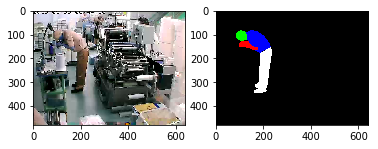

In [24]:
i=100

plt.subplot(121)
plt.imshow(imgs[i])
plt.subplot(122)
plt.imshow(labels[i])